In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai.tabular import *

# Rossmann

## Data preparation

To create the feature-engineered train_clean and test_clean from the Kaggle competition data, run `rossman_data_clean.ipynb`. One important step that deals with time series is this:

```python
add_datepart(train, "Date", drop=False)
add_datepart(test, "Date", drop=False)
```

In [3]:
path = Config().data_path()/'EURUSD'
train_df = pd.read_pickle(path/'train_clean')

In [4]:
train_df.head().T

,0,1,2,3,4
Timestamp,2018-01-01 17:00:00,2018-01-01 17:01:00,2018-01-01 17:02:00,2018-01-01 17:03:00,2018-01-01 17:04:00
Open,1.20037,1.20083,1.20035,1.20041,1.20049
High,1.201,1.20095,1.20043,1.2005,1.20049
Low,1.20037,1.20017,1.20035,1.20031,1.20046
Close,1.201,1.2003,1.20043,1.20046,1.20048
TimestampYear,2018,2018,2018,2018,2018
TimestampMonth,1,1,1,1,1
TimestampWeek,1,1,1,1,1
TimestampDay,1,1,1,1,1
TimestampDayofweek,0,0,0,0,0


In [5]:
n = len(train_df); n

372606

### Experimenting with a sample

In [8]:
idx = np.random.permutation(range(n))[:2000]
idx.sort()
small_train_df = train_df.iloc[idx[:1000]]
small_test_df = train_df.iloc[idx[1000:]]
small_cont_vars = ['Open', 'High','Low','Close','TimestampElapsed']
small_cat_vars =  ['TimestampMonth', 'TimestampWeek', 'TimestampDay']
small_train_df = small_train_df[small_cat_vars + small_cont_vars + ['Target']]
small_test_df = small_test_df[small_cat_vars + small_cont_vars + ['Target']]

In [9]:
small_train_df.head()

,TimestampMonth,TimestampWeek,TimestampDay,Open,High,Low,Close,Target
96,1,1,1,1.20126,1.20126,1.20113,1.20114,1.20113
465,1,1,2,1.20214,1.20219,1.20214,1.20219,1.20214
531,1,1,2,1.20267,1.20267,1.20261,1.20264,1.20277
535,1,1,2,1.20293,1.20296,1.20293,1.20295,1.20284
549,1,1,2,1.20312,1.20312,1.20287,1.20288,1.20283


In [10]:
small_test_df.head()

,TimestampMonth,TimestampWeek,TimestampDay,Open,High,Low,Close,Target
181662,6,26,27,1.16338,1.16345,1.16329,1.16345,1.16329
182525,6,26,27,1.15614,1.15614,1.15602,1.15609,1.15614
182702,6,26,27,1.15670,1.15670,1.15662,1.15663,1.15669
183187,6,26,28,1.15907,1.15915,1.15886,1.15914,1.15906
183441,6,26,28,1.15773,1.15810,1.15763,1.15802,1.15752


In [11]:
categorify = Categorify(small_cat_vars, small_cont_vars)
categorify(small_train_df)
categorify(small_test_df, test=True)

In [12]:
small_test_df.head()

,TimestampMonth,TimestampWeek,TimestampDay,Open,High,Low,Close,Target
181662,6,26,27,1.16338,1.16345,1.16329,1.16345,1.16329
182525,6,26,27,1.15614,1.15614,1.15602,1.15609,1.15614
182702,6,26,27,1.15670,1.15670,1.15662,1.15663,1.15669
183187,6,26,28,1.15907,1.15915,1.15886,1.15914,1.15906
183441,6,26,28,1.15773,1.15810,1.15763,1.15802,1.15752


In [13]:
small_train_df.TimestampMonth.cat.categories

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

In [14]:
#fill_missing = FillMissing(small_cat_vars, small_cont_vars,)
#fill_missing(small_train_df)
#fill_missing(small_test_df, test=True)

### Preparing full data set

In [6]:
train_df = pd.read_pickle(path/'train_clean')

In [7]:
len(train_df)

372606

In [8]:
#train_df.drop(['Timestamp'],axis=1)

In [9]:
procs=[FillMissing, Categorify, Normalize]

In [10]:
cat_vars = ["TimestampYear","TimestampMonth","TimestampWeek","TimestampDay","TimestampDayofweek",
            "TimestampDayofyear","TimestampIs_month_end","TimestampIs_month_start",
            "TimestampIs_quarter_end","TimestampIs_quarter_start","TimestampIs_year_end",
            "TimestampIs_year_start","TimestampHour","TimestampMinute","TimestampSecond"]

cont_vars = ['Open', 'High','Low','Close','TimestampElapsed']

In [13]:
dep_var = 'Target'
df = train_df[cat_vars + cont_vars + [dep_var,'Timestamp']].copy()
df.head()

,TimestampYear,TimestampMonth,TimestampWeek,TimestampDay,TimestampDayofweek,TimestampDayofyear,TimestampIs_month_end,TimestampIs_month_start,TimestampIs_quarter_end,TimestampIs_quarter_start,...,TimestampHour,TimestampMinute,TimestampSecond,Open,High,Low,Close,TimestampElapsed,Target,Timestamp
0,2018,1,1,1,0,1,False,True,False,True,...,17,0,0,1.20037,1.20100,1.20037,1.20100,1514826000,1.20030,2018-01-01 17:00:00
1,2018,1,1,1,0,1,False,True,False,True,...,17,1,0,1.20083,1.20095,1.20017,1.20030,1514826060,1.20043,2018-01-01 17:01:00
2,2018,1,1,1,0,1,False,True,False,True,...,17,2,0,1.20035,1.20043,1.20035,1.20043,1514826120,1.20046,2018-01-01 17:02:00
3,2018,1,1,1,0,1,False,True,False,True,...,17,3,0,1.20041,1.20050,1.20031,1.20046,1514826180,1.20048,2018-01-01 17:03:00
4,2018,1,1,1,0,1,False,True,False,True,...,17,4,0,1.20049,1.20049,1.20046,1.20048,1514826240,1.20048,2018-01-01 17:04:00


In [29]:
cut = int(len(train_df)*0.9)
cut

335345

In [30]:
valid_idx = range(cut,len(train_df))

In [31]:
valid_idx

range(335345, 372606)

In [32]:
df[dep_var].head()

0    1.20030
1    1.20043
2    1.20046
3    1.20048
4    1.20048
Name: Target, dtype: float64

In [33]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True)
                .databunch())

In [26]:
doc(DataBunch)

In [57]:
valid_dl=data.dl(ds_type=DatasetType.Valid)

In [ ]:
doc(FloatList)

## Model

In [35]:
max_log_y = np.log(np.max(train_df['Target'])*1.2)
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [36]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)

In [37]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 2)
    (1): Embedding(12, 6)
    (2): Embedding(48, 14)
    (3): Embedding(32, 11)
    (4): Embedding(7, 5)
    (5): Embedding(282, 38)
    (6): Embedding(3, 3)
    (7): Embedding(3, 3)
    (8): Embedding(3, 3)
    (9): Embedding(3, 3)
    (10): Embedding(2, 2)
    (11): Embedding(3, 3)
    (12): Embedding(25, 10)
    (13): Embedding(61, 16)
    (14): Embedding(2, 2)
  )
  (emb_drop): Dropout(p=0.04)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=126, out_features=1000, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(

In [38]:
len(data.train_ds.cont_names)

5

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


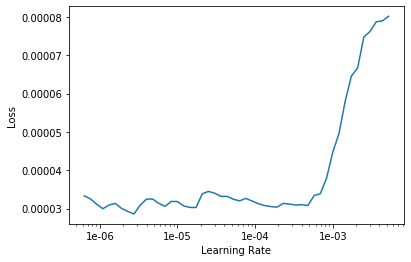

In [46]:
learn.recorder.plot()

In [41]:
learn.fit_one_cycle(5, 5e-6, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.000629,0.000667,0.026030,02:01
1,0.000031,0.000019,0.004107,02:02
2,0.000028,0.000002,0.001449,02:02
3,0.000029,0.000004,0.001894,02:02
4,0.000024,0.000003,0.001602,02:01


In [42]:
learn.save('1')

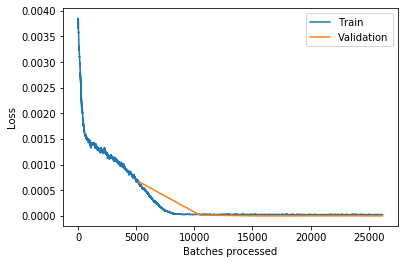

In [44]:
learn.recorder.plot_losses()

In [ ]:
learn.load('1');

In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.012223,0.014312,0.116988
2,0.012001,0.017789,0.117619
3,0.011402,0.035596,0.114396
4,0.010067,0.015125,0.113652
5,0.009148,0.031326,0.116344


In [ ]:
learn.fit_one_cycle(5, 3e-4)

epoch,train_loss,valid_loss,exp_rmspe
1,0.011840,0.013236,0.110483
2,0.010765,0.057664,0.129586
3,0.010101,0.042744,0.111584
4,0.008820,0.116893,0.135458
5,0.009144,0.017969,0.126323


(10th place in the competition was 0.108)

In [48]:
valid_preds=learn.get_preds(DatasetType.Valid)

valid_df=np.exp(valid_preds[0].data).numpy().T[0]


In [69]:
valid_dl.dataset.y[:10]

FloatList (10 items)
0.12885922,0.12888563,0.12911415,0.12921086,0.12906146
Path: C:\Users\marcel.barros\.fastai\data\EURUSD

In [71]:
valid_preds[0][:10]

tensor([[0.1311],
        [0.1306],
        [0.1307],
        [0.1310],
        [0.1310],
        [0.1310],
        [0.1315],
        [0.1311],
        [0.1308],
        [0.1306]])

In [ ]:
valid_df[["Id","Target"]].to_csv("rossmann_submission.csv",index=False)